# Bluesmart Data Analysis

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from pprint import pprint as pp
from pylab import figure, show
import math
import matplotlib.ticker as ticker



In [2]:
data = []
with open("loadCellData.csv", "r") as f:
    column_names = f.readline().strip().split(",")
    for i, line in enumerate(f):
        data.append(line.strip().split(","))
        
pp (list(enumerate(column_names)))
print "total rows in the data: %s"%len(data)
pp(data[:1])

[(0, 'col'),
 (1, 'InOut'),
 (2, 'Load cell SN'),
 (3, '0kg'),
 (4, '1kg'),
 (5, '2kg'),
 (6, '3kg'),
 (7, '4kg'),
 (8, '5kg'),
 (9, '6kg'),
 (10, '7kg'),
 (11, '8kg'),
 (12, '9kg'),
 (13, '10kg')]
total rows in the data: 90
[['1',
  'Out of Spec',
  '7031',
  '-4.4',
  '-3.4',
  '-2.4',
  '-1.5',
  '-0.5',
  '0.3',
  '1.3',
  '2.2',
  '3.2',
  '4.2',
  '5.2']]


In [3]:
data[0][3:]

['-4.4',
 '-3.4',
 '-2.4',
 '-1.5',
 '-0.5',
 '0.3',
 '1.3',
 '2.2',
 '3.2',
 '4.2',
 '5.2']

In [4]:
inspec_data = []
outspec_data = []

for row in data:
    if row[1] == "In Spec":
        inspec_data.append([float(i) for i in row[3:]])
    else:
        outspec_data.append([float(i) for i in row[3:]])
        


In [5]:

def make_plots(px, py, title='title', xlabel='xlabel', ylabel='ylabel', legend='legend'):
    fig, ax = plt.subplots(figsize=(16, 8))
    colors = ['k', 'r', 'y', 'g', 'm', 'b']
    for i in xrange(len(py)):
        ax.plot(px, py[i], '-', color=colors[i%6], linewidth=2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    ax.grid(True)
    plt.show()

def make_plot(px, py, title='title', xlabel='xlabel', ylabel='ylabel', legend='legend', color = 'r', ylim=None):
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.plot(px, py, '-', color=color, alpha = 0.5, label=legend, linewidth=2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    ax.legend()
    ax.grid(True)
    plt.show()

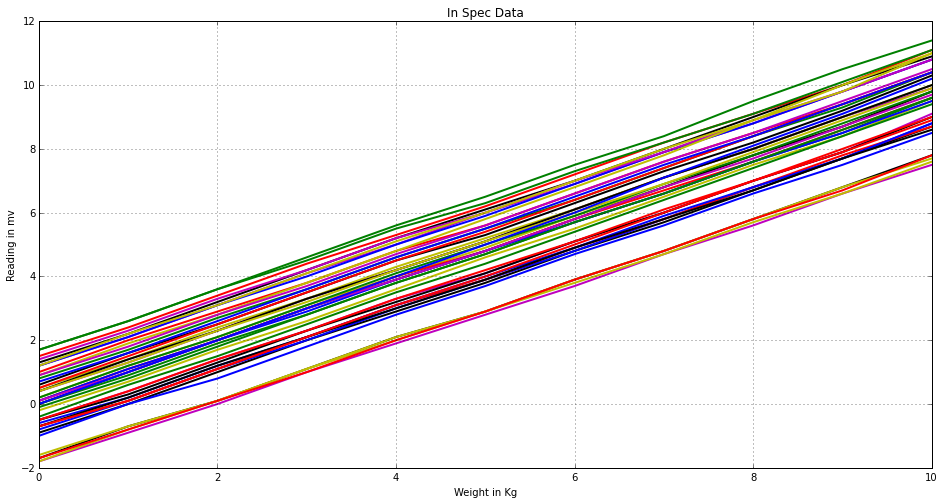

In [6]:
# plotting in-spec 
make_plots(range(11), inspec_data,
          "In Spec Data",
          "Weight in Kg",
          "Reading in mv",
          ""
         )    

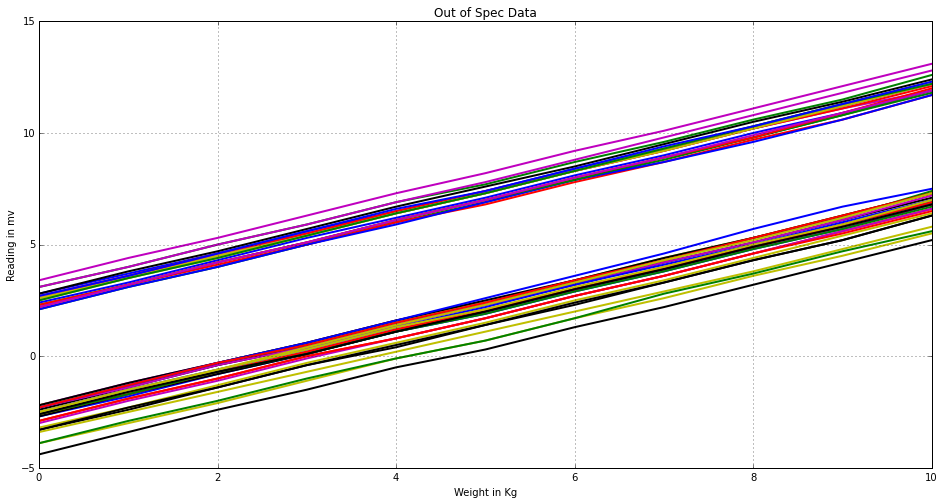

In [7]:
# plotting out of spec 
make_plots(range(11), outspec_data,
          "Out of Spec Data",
          "Weight in Kg",
          "Reading in mv",
         ) 

## Q1. Is out of spec is linear?


In [8]:
#Calculating least squared errors
def get_least_sqrd_err(slope, intercept, data):
    errs = 0.0
    for i in range(len(data)):
        errs += (data[i]-((slope*i)+intercept))**2
    return math.sqrt(errs)    
        

In [9]:
outspec_data_errors = []
initial_values = []
slopes = []
for row in outspec_data:
    slope, intercept, r_value, p_value, std_err = stats.linregress(range(11),row)
    outspec_data_errors.append(get_least_sqrd_err(slope, intercept, row))
    initial_values.append(row[0])
    slopes.append(slope)
    

In [10]:
initial_values,outspec_data_errors = zip(*sorted(zip(initial_values,outspec_data_errors)))

## Relation between the initial value and the non linearity


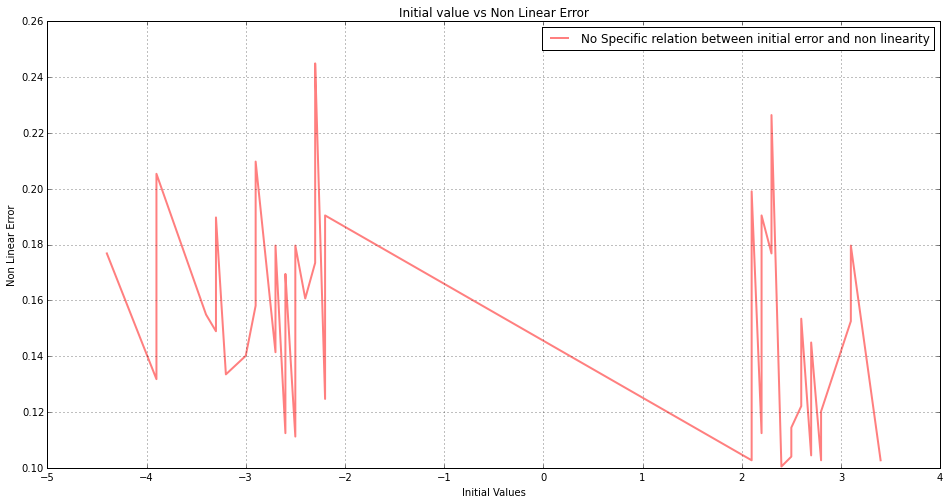

In [11]:
#Plot Initial value vs Error
make_plot(initial_values, outspec_data_errors,
          "Initial value vs Non Linear Error ",
          "Initial Values",
          "Non Linear Error",
          "No Specific relation between initial error and non linearity"
         )    

## Q2. Correcting zero errors


In [12]:
# Correcting zero error for out of spec data
new_outspec_data = []
for row in outspec_data:
    zero_err = row[0]
    new_outspec_data.append([i-zero_err for i in row])


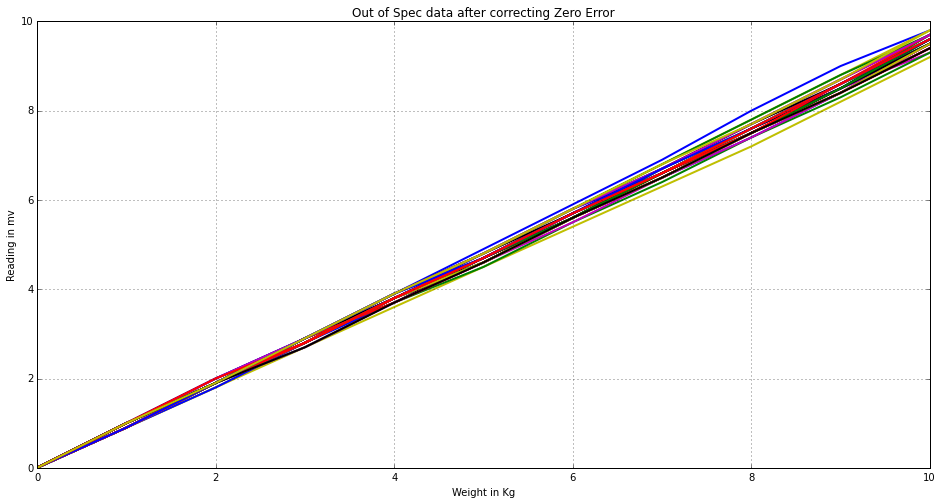

In [13]:
make_plots(range(11), new_outspec_data,
          "Out of Spec data after correcting Zero Error",
          "Weight in Kg",
          "Reading in mv",
          ""
         )  

### Getting the linear ones from Out of Spec data


In [14]:
print "Out of Spec errors:"
print sorted([round(i,3) for i in outspec_data_errors])

Out of Spec errors:
[0.1, 0.103, 0.103, 0.103, 0.104, 0.104, 0.111, 0.112, 0.112, 0.114, 0.12, 0.122, 0.125, 0.132, 0.133, 0.136, 0.14, 0.141, 0.141, 0.145, 0.149, 0.153, 0.153, 0.153, 0.155, 0.158, 0.161, 0.165, 0.169, 0.173, 0.177, 0.177, 0.18, 0.18, 0.18, 0.19, 0.19, 0.19, 0.191, 0.199, 0.205, 0.21, 0.226, 0.226, 0.245]


### Linearity threshold
* Let us assume devices which have less than 0.17 error are linear (just something I came up with after looking at the above data)

In [15]:
linearity_threshold = 0.17
error, slopes = zip(*([(x,y) for x,y in sorted(zip(outspec_data_errors, slopes)) if x < linearity_threshold]))

In [16]:
# variance of the Linear Slopes 
np.var(slopes)
# = 0.00023621230137282599

0.00028708640834897565

### how much error we may incurr if we assume that all are the same. 


In [17]:
#Range of error in reading in mv
[0.00023621230137282599*i for i in xrange(11)]
#0.0 to 0.0024

[0.0,
 0.000236212301372826,
 0.000472424602745652,
 0.000708636904118478,
 0.000944849205491304,
 0.00118106150686413,
 0.001417273808236956,
 0.001653486109609782,
 0.001889698410982608,
 0.002125910712355434,
 0.00236212301372826]